In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy import constants as c

#Make np arrays print in scientific notation:
np.set_printoptions(formatter={'float': lambda x: format(x, '9.4E')})

In [2]:
indx, halomass, haloradius, vmax, xpos, y, z, v_x, v_y, v_z = np.loadtxt (
    "halo_bolshoi_z0.00_D360.dat", unpack=True)
#halo mass per 250 cubic megaparsecs per h0

In [3]:
#Output the arrays in a columnated format so I can see what I'm working with
np.savetxt("columnated.txt",zip(indx,halomass,haloradius,vmax,xpos, y, z, v_x,
                         v_y, v_z), fmt='%30.8f')

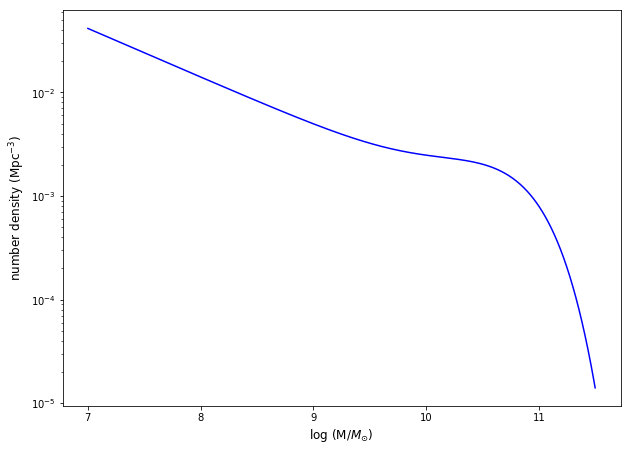

In [4]:
m_ast = 10.**10.66 #M* in solar mass
phi_ast1 = 3.96*10.**-3. #Mpc^-3
alpha1 = -0.35
phi_ast2 = 0.79*10.**-3. #Mpc^-3
alpha2 = -1.47

logmratio = np.linspace(7,11.5,1000) #Log of Galaxy mass to solar mass
m = 10**logmratio #galaxy mass in solar mass
phi = np.exp(-m/m_ast)*(phi_ast1*(m/m_ast)**alpha1+phi_ast2*(m/m_ast)
                        **alpha2)/m_ast*m

fig=plt.figure(figsize=(10,16))

galaxymassplt=fig.add_subplot(2,1,1)

galaxymassplt.semilogy(logmratio,phi,'b-')
galaxymassplt.set_ylabel('number density (Mpc$^{-3}$)',fontsize=12)
galaxymassplt.set_xlabel('log (M/$M_{\odot}$)',fontsize=12)

plt.show()

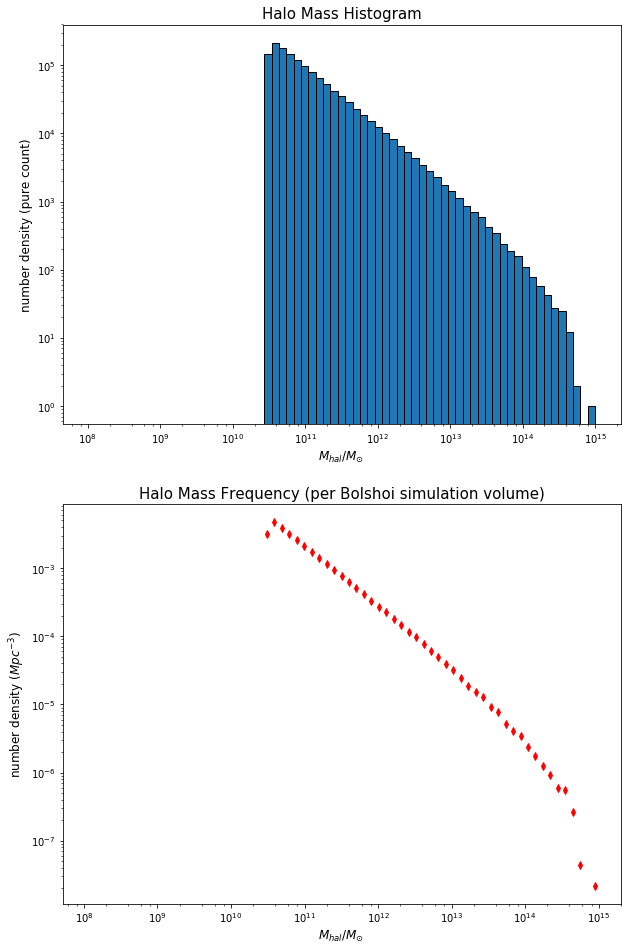

In [5]:
bins=np.logspace(8,15,(15.-8.)/0.1)
logbins=np.log10(bins)

fig=plt.figure(figsize=(10,25))

halomassplot=fig.add_subplot(3,1,1)
halofreq, binsout, patches = halomassplot.hist(halomass,bins=bins,edgecolor='k')
halomassplot.set_xscale('log')
halomassplot.set_yscale('log')
halomassplot.set_ylabel('number density (pure count)',fontsize=12)
halomassplot.set_xlabel('$M_{hal}/M_{\odot}$',fontsize=12)
halomassplot.set_title('Halo Mass Histogram',fontsize=15)

halofreq=halofreq/(250./0.7)**3. #frequency per cubic megaparsec
midbins = (binsout[1:]+binsout[:-1])/2.
logmidbins=np.log10(midbins)

dotplot=fig.add_subplot(3,1,2)
dotplot.plot(midbins,halofreq,'rd',markersize=5)
dotplot.set_xscale('log')
dotplot.set_yscale('log')
dotplot.set_ylabel('number density ($Mpc^{-3}$)',fontsize=12)
dotplot.set_xlabel('$M_{hal}/M_{\odot}$',fontsize=12)
dotplot.set_title('Halo Mass Frequency (per Bolshoi simulation volume)',fontsize=15)

plt.show()

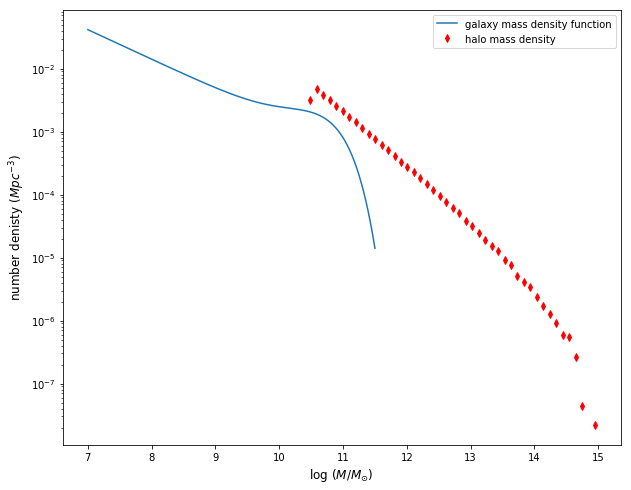

In [6]:
plt.figure(figsize=(10,8))

plt.semilogy(logmratio,phi,label='galaxy mass density function') #Plot the galaxy mass function
plt.xlabel('log ($M/M_{\odot}$)',fontsize=12)
plt.ylabel('number denisty ($Mpc^{-3}$)',fontsize=12)
#plt.ylim(10.**-5.,10.**-0.5)
#plt.xlim(6.8,12.4)

plt.semilogy(logmidbins,halofreq,'rd',markersize=5,label='halo mass density')

plt.legend()

plt.show()

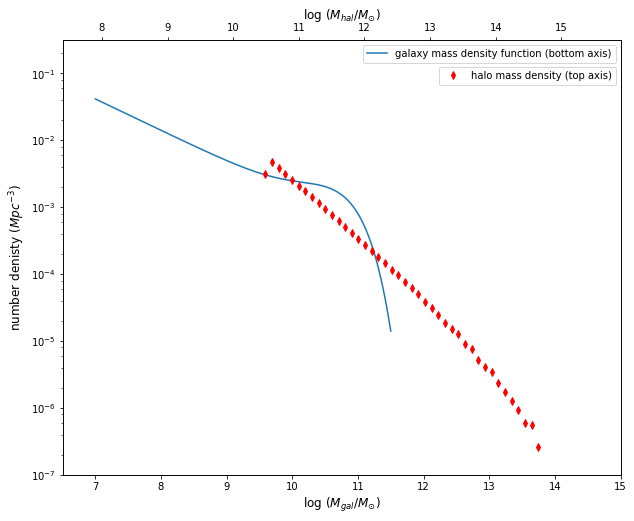

In [7]:
plt.figure(figsize=(10,8))

plt.semilogy(logmratio,phi,label='galaxy mass density function (bottom axis)') #Plot the galaxy mass function
plt.xlabel('log ($M_{gal}/M_{\odot}$)',fontsize=12)
plt.ylabel('number denisty ($Mpc^{-3}$)',fontsize=12)
plt.xlim(6.5,15)

plt.legend()

plt.twiny() #make a second x axis
plt.ylim(10.**-7.,10.**-0.5)

plt.semilogy(logmidbins,halofreq,'rd',markersize=5,label='halo mass density (top axis)')
plt.xlim(7.4,15.9)
plt.xlabel('log ($M_{hal}/M_{\odot}$)',fontsize=12)

plt.legend(bbox_to_anchor=[1,0.95])

plt.show()

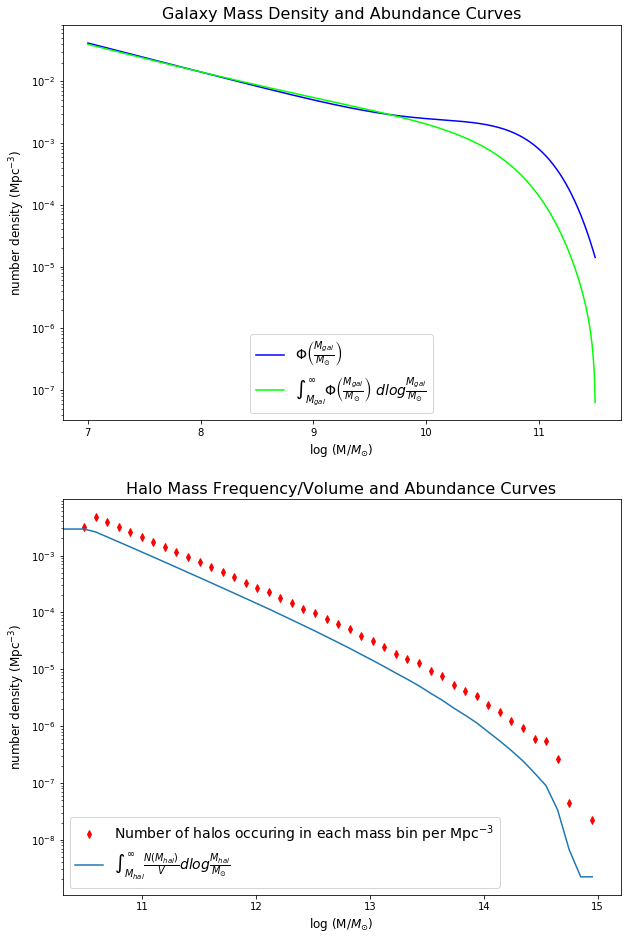

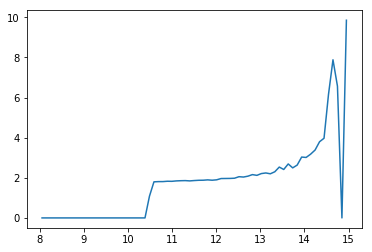

[0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00
 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00
 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00
 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00
 1.0838E+00 1.7986E+00 1.8103E+00 1.8114E+00 1.8283E+00 1.8250E+00
 1.8453E+00 1.8550E+00 1.8604E+00 1.8458E+00 1.8636E+00 1.8767E+00
 1.8796E+00 1.8970E+00 1.8801E+00 1.8995E+00 1.9635E+00 1.9663E+00
 1.9695E+00 1.9795E+00 2.0552E+00 2.0379E+00 2.0818E+00 2.1593E+00
 2.1226E+00 2.2112E+00 2.2416E+00 2.2005E+00 2.3007E+00 2.5354E+00
 2.4149E+00 2.6911E+00 2.4960E+00 2.6342E+00 3.0345E+00 3.0158E+00
 3.1784E+00 3.3847E+00 3.7982E+00 3.9723E+00 6.1607E+00 7.8857E+00
 6.5714E+00 0.0000E+00 9.8571E+00]
0.028798345856
0.00292156909171


In [38]:
#CREATE THE ABUNDANCE CURVE FOR GALAXY MASS
revphi = np.flip(phi,0) #reverse galaxy number density array so I can calculate the area as the integral from M_gal to inf
revlogmratio = np.flip(logmratio,0) #reverse the logmratio array so I can plot the area later in the code
dx_gal = (logmratio.max()-logmratio.min())/(len(logmratio))
sumdy_gal = np.array([revphi[:i].sum() for i in np.arange(1,len(phi)+1,1)])
galaxyarea=sumdy_gal*dx_gal

fig=plt.figure(figsize=(10,16))

galaxymassplt=fig.add_subplot(2,1,1)
#Replot the galaxy mass density function created earlier
galaxymassplt.semilogy(logmratio,phi,'b-',
                      label='$\\Phi \\left(\\frac{M_{gal}}{M_{\\odot}} \\right)$')
galaxymassplt.set_ylabel('number density (Mpc$^{-3}$)',fontsize=12)
galaxymassplt.set_xlabel('log (M/$M_{\odot}$)',fontsize=12)
#Plot the area under the galaxy mass density function according to the integral from M_gal to inf
galaxymassplt.semilogy(revlogmratio,galaxyarea,color=(0,1,0),
                       label='$\\int_{M_{gal}}^{\\infty}\\Phi \\left(\\frac{M_{gal}}{M_{\\odot}} \\right)\;'
                       'dlog\\frac{M_{gal}}{M_{\\odot}}$')
galaxymassplt.legend(fontsize=14,loc='lower center')
galaxymassplt.set_title('Galaxy Mass Density and Abundance Curves',fontsize=16)
                        
#CREATE THE ABUNDANCE CURVE FOR HALO MASS
revhalofreq = np.flip(halofreq,0) #reverse the halo frequency array so I can calculate the area as the integral from M_hal to inf
revlogmidbins = np.flip(logmidbins,0) #reverse the logmidbins array so I can plot the area later in the code
dx_hal=(logbins.max()-logbins.min())/(len(logbins)-1)
sumdy_hal=np.array([revhalofreq[:i].sum() for i in np.arange(1,len(revhalofreq)+1,1)])
haloarea=sumdy_hal*dx_hal

haloabundanceplt=fig.add_subplot(2,1,2)
haloabundanceplt.semilogy(logmidbins,halofreq,'rd',markersize=5,label='Number of halos occuring in each mass bin per Mpc$^{-3}$')
haloabundanceplt.semilogy(revlogmidbins,haloarea,label='$\\int_{M_{hal}}^{\infty}\\frac{N(M_{hal})}{V}dlog\\frac{M_{hal}}{M_{\odot}}$')
haloabundanceplt.set_xlabel('log (M/$M_{\odot}$)',fontsize=12)
haloabundanceplt.set_ylabel('number density (Mpc$^{-3}$)',fontsize=12)
haloabundanceplt.legend(fontsize=14)
haloabundanceplt.set_title('Halo Mass Frequency/Volume and Abundance Curves',fontsize=16)
haloabundanceplt.set_xlim(10.3,15.2)

plt.savefig('Abundance Curves.png')
plt.show()

revhaloarea=np.flip(haloarea,0)
plt.plot(logmidbins,halofreq/revhaloarea)
plt.show()

arr=halofreq/revhaloarea
print arr
print halomass.size/(250./0.7)**3.
print np.max(haloarea)

